In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
!pip install pingouin
import pingouin as pg
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.weightstats import ztest
from scipy.stats import f_oneway

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.9 MB/s eta 0:00:00


In [ ]:
# Mendapatkan dataset marketing_campaign
df = pd.read_csv('marketing_campaign.csv', delimiter="\t")

# Melihat 5 baris pertama dari dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Melihat detail informasi dari setiap kolom pada dataset marketing_campaign
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Mengisi nilai NaN pada kolom income dengan median
df['Income'] = df['Income'].fillna(df['Income'].median())

In [ ]:
#Melihat kembali apakah nilai NaN sudah terisi pada kolom income dengan nilai median
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **Statistik Deskriptif**

**Quantiles; Percentiles**

In [ ]:
#Mendapatkan Nilai Quartile 1, Quartile 2, Quartile 3  dari Dataset df pada kolom Income
q1 = df['Income'].quantile(0.25)
q2 = df['Income'].quantile(0.5)
q3 = df['Income'].quantile(0.75)

print(f'Quartile 1: {q1}')
print(f'Quartile 2: {q2}')
print(f'Quartile 3: {q3}')

Quartile 1: 35538.75
Quartile 2: 51381.5
Quartile 3: 68289.75


In [ ]:
#Mendapatkan Nilai Persentiles dari Dataset df pada kolom Income
p95 = df['Income'].quantile(0.95)
p99 = df['Income'].quantile(0.99)

print(p95, p99)

83926.99999999994 94437.68000000001


##Central Tendency Measures

**Mean, Median, Modus**

In [ ]:
#Mendapatkan Nilai Mean dari Dataset df pada kolom Income
df['Income'].mean()

52237.97544642857

In [ ]:
#Mendapatkan Nilai Median dari Dataset df pada kolom Income
df['Income'].median()

51381.5

In [ ]:
df['Education'].mode()[0]

'Graduation'

In [ ]:
#Mendapatkan Nilai Mode dari Dataset df pada kolom Education
education_counts = df['Education'].value_counts()
print(education_counts)

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


##Spread Measures

**Variance, Standard Deviation**

In [ ]:
#Mendapatkan Nilai Variance Income pada Dataset marketing_campaign
df['Income'].var()

626899235.1807307

In [ ]:
#Mendapatkan Nilai standar deviasi Income pada Dataset marketing_campaign
df['Income'].std()

25037.955890621957

**Min, Max Income**

In [ ]:
#Mendapatkan Nilai Minimal Income
df['Income'].min()

1730.0

In [ ]:
#Mendapatkan Nilai Maximal Income
df['Income'].max()

666666.0

## Grafik Histogram dan Boxplot

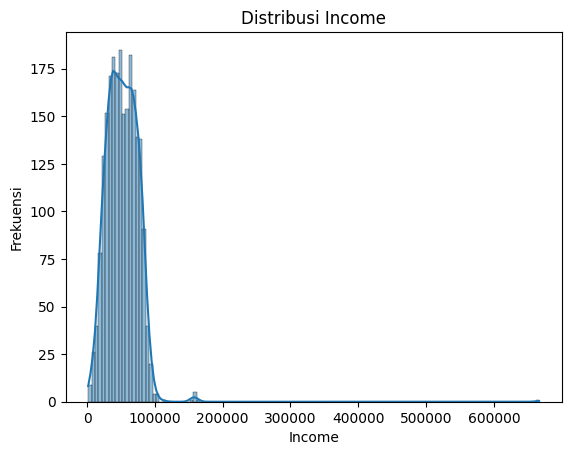

In [ ]:
#Grafik histogram untuk melihat distribusi income
sns.histplot(data=df ,x='Income', kde=True)
plt.title('Distribusi Income')
plt.xlabel('Income')
plt.ylabel('Frekuensi')
plt.show()

Insight:

Grafik Histogram diatas termasuk Right-Skewed atau Positively Skewed.\
Dimana nilai mean lebih besar daripada nilai median.

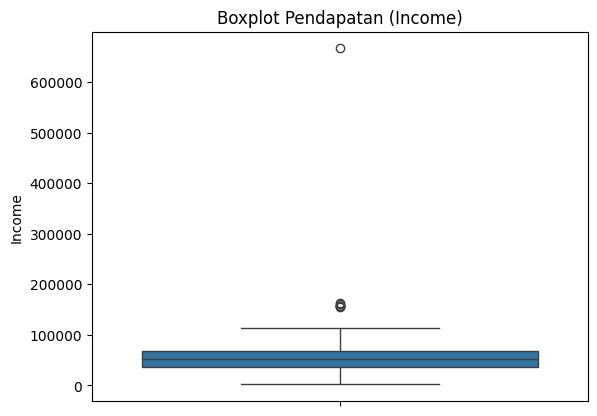

In [ ]:
# Membuat boxplot pendapatan (income)
sns.boxplot(y='Income', data=df)
plt.title('Boxplot Pendapatan (Income)')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

Insight:

pada Grafik Boxplot terdapat outlier

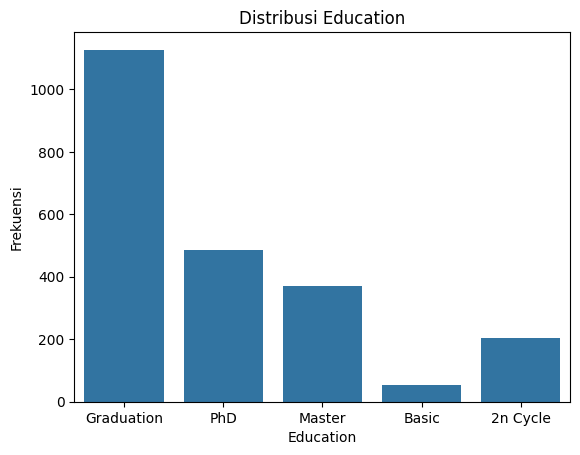

In [ ]:
#Grafik countplot untuk melihat distribusi dari education
sns.countplot(data=df, x='Education')
plt.title('Distribusi Education')
plt.xlabel('Education')
plt.ylabel('Frekuensi')
plt.show()

**Insight**:

1. Rata-rata pendapatan 52,237 menunjukan bahwa sebagian besar individu memiliki pendapatan sekitar angka tersebut, tetapi karena standar deviasinya 25,037 cukup besar, ada variasi yang cukup signifikan di sekitar rata-rata tersebut.

2. Pada rentang pendapatan min:1,730 dan max: 666,666, ini menunjukan terdapat distribusi pendapatan yang sangat lebar dan kemungkinan adanya outlier disebabkan pendapatan yang sangat tinggi.

3. Median/kuartil kedua : 51,381.50, yang dekat dengan rata-rata menunjukkan bahwa distribusi data relatif simetris, meskipun adanya outlier dengan pendapatan tinggi.

4. Tingkat Pendidikan terbanyak yaitu pada tingkatan Graduation sebanyak 1127


## **Uji Hipotesis**

In [ ]:
# Menghitung rata-rata income berdasarkan tingkat pendidikan
rata_rata_pendapatan = df.groupby('Education')['Income'].mean()

# Menampilkan hasilnya
print(rata_rata_pendapatan)

Education
2n Cycle      47688.583744
Basic         20306.259259
Graduation    52707.305679
Master        52896.777027
PhD           56096.303498
Name: Income, dtype: float64


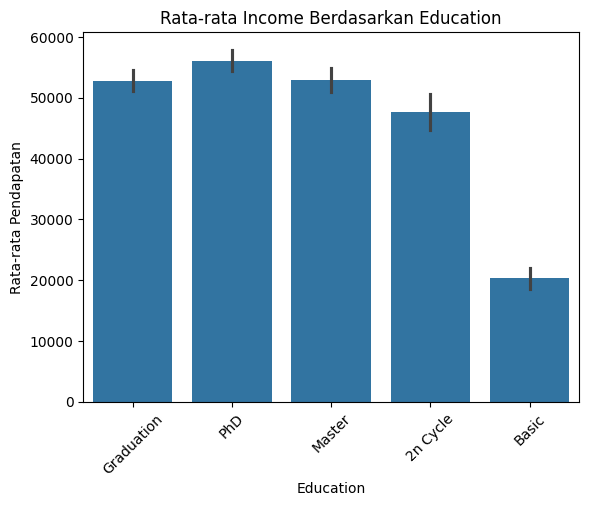

In [ ]:
#Grafik barplot untuk melihat rata-rata income berdasarkan tingkat pendidikan
sns.barplot(data=df, x='Education', y='Income', estimator='mean', order=df['Education'].value_counts().index)
plt.title('Rata-rata Income Berdasarkan Education')
plt.xlabel('Education')
plt.ylabel('Rata-rata Pendapatan')
plt.xticks(rotation=45)
plt.show()

Insight:

- Basic (pendidikan dasar) menunjukkan rata-rata pendapatan yang paling rendah dibandingkan dengan kelompok pendidikan lainnya. Ini mungkin karena individu dengan tingkat pendidikan dasar cenderung memiliki lebih sedikit keterampilan teknis dan pengalaman profesional.
- PhD menunjukkan pendapatan tertinggi, yang dapat diharapkan karena tingkat pendidikan ini sering dikaitkan dengan karier yang lebih profesional atau penelitian dengan gaji yang lebih tinggi.
- Kelompok Master dan Graduation memiliki rata-rata pendapatan yang hampir setara, yang menunjukkan bahwa individu dengan pendidikan tinggi seperti gelar master atau sarjana dapat memiliki pendapatan yang serupa, tetapi lebih tinggi dibandingkan dengan pendidikan dasar.

Kesimpulan :
Ada perbedaan rata-rata pendapatan yang signifikan berdasarkan tingkat pendidikan, dengan individu yang memiliki gelar PhD dan Master cenderung memiliki pendapatan yang lebih tinggi dibandingkan dengan mereka yang memiliki tingkat pendidikan lebih rendah.

In [ ]:
# Memisahkan data untuk semua kategori
graduation_income = df[df['Education'] == 'Graduation']['Income'].dropna()
phd_income = df[df['Education'] == 'PhD']['Income'].dropna()
master_income = df[df['Education'] == 'Master']['Income'].dropna()
basic_income = df[df['Education'] == 'Basic']['Income'].dropna()
cycle_income = df[df['Education'] == '2n Cycle']['Income'].dropna()

**ANOVA**

Untuk menguji apakah ada hubungan yang signifikan antara pendidikan dan pendapatan dalam dataset, kita akan melakukan uji hipotesis yang tepat untuk mengukur hubungan antara dua variabel ini. Mengingat pendidikan adalah variabel kategorikal dan pendapatan adalah variabel numerik, uji yang tepat adalah Uji ANOVA (Analysis of Variance)

In [ ]:
#membandingkan rata-rata pendapatan dengan tingkat pendidikan (graduation, phd, master, basic, 2n cycle) menggunakan ANOVA (Analysis of Variance)
f_stat, p_val = f_oneway(graduation_income, phd_income, master_income, basic_income, cycle_income)

print(f"ANOVA Results: f_stat = {f_stat:.4f}, p_val = {p_val:.4f}")

# Interpretasi hasil
if p_val < 0.05:
    print("Ada perbedaan signifikan rata-rata pendapatan antara tingkat pendidikan.")
else:
    print("Tidak ada perbedaan signifikan rata-rata pendapatan antara tingkat pendidikan.")

ANOVA Results: f_stat = 27.9665, p_val = 0.0000
Ada perbedaan signifikan rata-rata pendapatan antara tingkat pendidikan.


Insight:

**H₀ (Hipotesis Nol)** menyatakan bahwa pendidikan tidak berpengaruh pada pendapatan, atau rata-rata pendapatan antar tingkat pendidikan tidak berbeda.

**H₁ (Hipotesis Alternatif)** menyatakan bahwa tingkat pendidikan memiliki pengaruh terhadap pendapatan, yang menyebabkan perbedaan rata-rata pendapatan antar kelompok.

- Nilai **f_stat** = 27.9665 menunjukkan bahwa variabilitas rata-rata pendapatan antar kelompok pendidikan lebih besar dibandingkan dengan variabilitas di dalam kelompok. Semakin besar nilai F, semakin besar perbedaan antara kelompok.
- Nilai **p_val** = 0.0000 sangat kecil (lebih kecil dari 0.05), yang berarti hasilnya signifikan secara statistik. Sehingga menolak hipotesis nol (H₀).

Kesimpulan:
Ada perbedaan signifikan rata-rata pendapatan di antara kelompok pendidikan yang dibandingkan. Yang artinya, tingkat pendidikan memengaruhi rata-rata pendapatan secara statistik.

**Melihat apakah benar ada perbedaan siginfikan rata-rata pendapatan di antara kelompok pendidikan dengan menggunakan T-Test**


**T-Test**

In [ ]:
# Melakukan t-test untuk membandingkan pendapatan antara "Graduation" dan "PhD"
t_stat, p_val = stats.ttest_ind(phd_income, graduation_income,  equal_var=False)

print(f"T-Test Results: t_stat = {t_stat:.4f}, p_val = {p_val:.4f}")

# Interpretasi hasil
if p_val < 0.05:
    print("Ada perbedaan signifikan rata-rata pendapatan antara Graduation dan PhD.")
else:
    print("Tidak ada perbedaan signifikan rata-rata pendapatan antara Graduation dan PhD.")

T-Test Results: t_stat = 2.7105, p_val = 0.0068
Ada perbedaan signifikan rata-rata pendapatan antara Graduation dan PhD.


Insight:

**Hipotesis Nol (H₀)**: Tidak ada perbedaan rata-rata pendapatan antara individu dengan tingkat pendidikan Graduation dan PhD.

**Keputusan:**
- Karena **p_val 0.0068** yang artinya kurang dari 0.05, kita menolak hipotesis nol (H₀).
- Ada perbedaan signifikan rata-rata pendapatan antara individu dengan pendidikan Graduation dan PhD.

**Makna Nilai t-statistik:**
Karena **t_stat = 2.7105** yang artinya t_stat > 0, kelompok dengan tingkat pendidikan Graduation memiliki rata-rata pendapatan yang lebih tinggi dibandingkan kelompok dengan pendidikan PhD.

In [ ]:
# Melakukan t-test untuk membandingkan pendapatan antara "master" dan "'2n Cycle'"
t_stat, p_val = stats.ttest_ind(master_income, cycle_income, equal_var=False)

print(f"T-Test Results: t_stat = {t_stat:.4f}, p_val = {p_val:.4f}")

# Interpretasi hasil
if p_val < 0.05:
    print("Ada perbedaan signifikan rata-rata pendapatan antara master dan 2n Cycle.")
else:
    print("Tidak ada perbedaan signifikan rata-rata pendapatan antara master dan 2n Cycle.")

T-Test Results: t_stat = 2.8004, p_val = 0.0054
Ada perbedaan signifikan rata-rata pendapatan antara master dan 2n Cycle.


Insight:

**Hipotesis Nol (H₀)**: Tidak ada perbedaan rata-rata pendapatan antara individu dengan tingkat pendidikan Master dan 2n Cycle.

**Keputusan:**
- Karena **p_val 0.0000** yang artinya kurang dari 0.05, kita menolak hipotesis nol (H₀).
- Ada perbedaan signifikan rata-rata pendapatan antara individu dengan pendidikan Master dan 2n Cycle.

**Makna Nilai t-statistik:**
Karena **t_stat = 2.8004** yang artinya t_stat > 0, kelompok dengan tingkat pendidikan master memiliki rata-rata pendapatan yang lebih tinggi dibandingkan kelompok dengan pendidikan 2n cycle.

## Kesimpulan akhir:

1. Distribusi Pendapatan
- Rata-rata pendapatan: 52,237 dengan median: 51,381.50 menunjukkan bahwa data relatif simetris. Namun, adanya nilai pendapatan minimum (1,730) dan maksimum (666,666) menunjukkan variasi yang sangat besar, kemungkinan disebabkan oleh outlier (pendapatan sangat tinggi).
- Standar deviasi: 25,037 menunjukkan variasi yang signifikan di sekitar rata-rata.

2. Hubungan Pendidikan dan Pendapatan
  - Tingkat pendidikan Graduation memiliki jumlah individu terbanyak (1,127), sementara Basic memiliki individu paling sedikit (54).\
  Rata-rata pendapatan per tingkat pendidikan:
    - Basic: Pendapatan rata-rata paling rendah.
    - PhD: Pendapatan rata-rata tertinggi, yang sejalan dengan ekspektasi karena PhD biasanya terkait dengan karier yang lebih profesional atau penelitian.
    - Graduation dan Master: Rata-rata pendapatan yang hampir sama, mencerminkan potensi penghasilan yang baik untuk lulusan pendidikan tinggi.


3. Hasil Uji Hipotesis: Pendidikan vs Pendapatan

  **ANOVA Test:**
    - Nilai f_stat = 27.9665 dan p_val = 0.0000 menunjukkan adanya perbedaan signifikan rata-rata pendapatan antar tingkat pendidikan.
    - Dengan demikian, hipotesis nol (H₀) yang menyatakan tidak ada pengaruh pendidikan terhadap pendapatan ditolak, dan hipotesis alternatif (H₁) diterima.
    - Kesimpulan: Tingkat pendidikan memiliki pengaruh signifikan terhadap rata-rata pendapatan.

4. Perbandingan Pendapatan Spesifik dengan T-Test

    Graduation vs PhD:
    - Nilai t_stat = -2.7105 dan p_val = 0.0068 menunjukkan bahwa terdapat perbedaan signifikan secara statistik antara rata-rata pendapatan individu dengan tingkat pendidikan Graduation dan PhD.
    - Interpretasi: Pendidikan PhD memiliki rata-rata pendapatan lebih tinggi dibandingkan Graduation.

   Master vs 2n Cycle:
    - Nilai t_stat = 2.8004 dan p_val = 0.0000 menunjukkan bahwa terdapat perbedaan signifikan secara statistik antara rata-rata pendapatan individu dengan tingkat pendidikan Master dan 2n Cycle.
    - Interpretasi: Pendidikan Master memiliki rata-rata pendapatan jauh lebih tinggi dibandingkan 2n Cycle


  **Pendidikan memiliki dampak signifikan terhadap pendapatan, dengan tingkat pendidikan yang lebih tinggi (PhD, Master) cenderung menghasilkan pendapatan yang lebih tinggi dibandingkan tingkat pendidikan yang lebih rendah (Basic, Graduation).**
